### First let's import some libraries and get some public data

#### Imports

In [1]:
import numpy as np
import pandas_datareader.data as web
#%matplotlib notebook

#### Fetch S&P500 ETF market data

In [2]:
sp = web.DataReader('SPY', 'yahoo', start='1990-01-01')

In [3]:
sp.head()

,Open,High,Low,Close,Volume,Adj Close
Date,,,,,,
1993-01-29,43.9687,43.9687,43.7500,43.9375,1003200,28.165877
1993-02-01,43.9687,44.2500,43.9687,44.2500,480500,28.366203
1993-02-02,44.2187,44.3750,44.1250,44.3437,201300,28.426269
1993-02-03,44.4062,44.8437,44.3750,44.8125,529400,28.726791
1993-02-04,44.9687,45.0937,44.4687,45.0000,531500,28.846986


#### Now let's add some computed information

In [4]:
#adding '_' to facilitate handling the column
sp.rename(columns={'Adj Close':'Adj_Close'}, inplace=True) 
sp['p_r'] = sp.Adj_Close/sp.Adj_Close.shift()-1        #simple returns
sp['l_r'] = np.log(sp.Adj_Close/sp.Adj_Close.shift())  #log returns
sp.tail()

,Open,High,Low,Close,Volume,Adj_Close,p_r,l_r
Date,,,,,,,,
2016-10-03,215.820007,216.039993,215.039993,215.779999,83512100,215.779999,-0.002404,-0.002407
2016-10-04,215.910004,216.169998,213.990005,214.679993,119948100,214.679993,-0.005098,-0.005111
2016-10-05,215.410004,216.130005,215.330002,215.630005,72816000,215.630005,0.004425,0.004415
2016-10-06,215.369995,216.039993,214.740005,215.779999,62927400,215.779999,0.000696,0.000695
2016-10-07,216.100006,216.300003,214.190002,215.039993,88510700,215.039993,-0.003429,-0.003435


#### Now let's plot the histogram of the SPY *log returns*. It tends to a normal distribution.

<IPython.core.display.Javascript object>


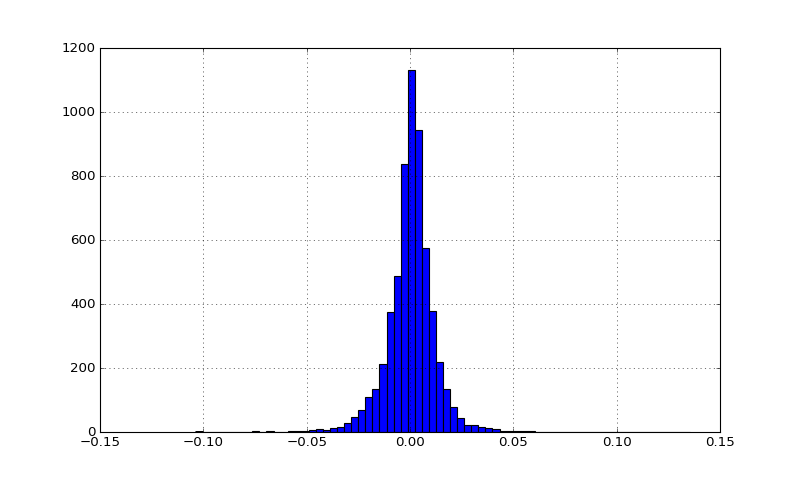

In [6]:
sp.l_r.hist(bins=70, figsize=(10,6))

#### Now let's get to Benford

In [5]:
import benford as bf

##### The classes First, Second and LastTwo represent the Benfords's Expected proportions for the first, second and last two digits. Note that First may be applied to the first one, first two and first three digits by changing the 'digs' parameter. Plotting the expected proportions is True by default, but may be supressed if one only wants to use the resulting DataFrame.

<IPython.core.display.Javascript object>


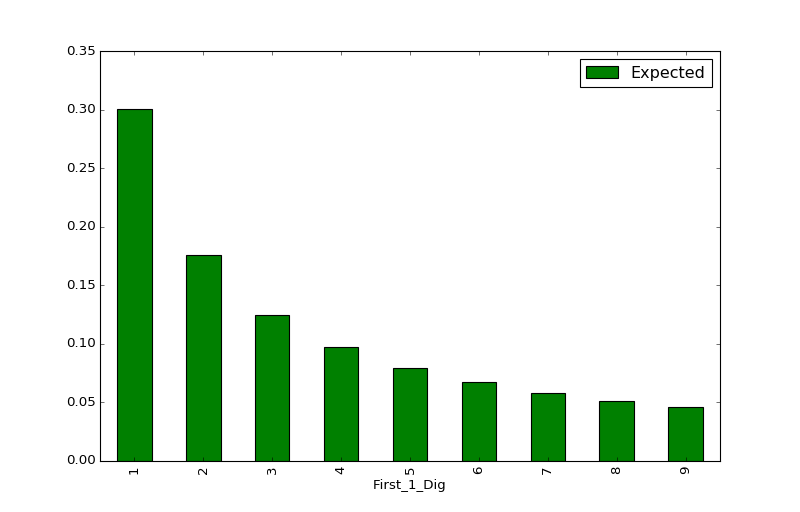

In [8]:
f1d = bf.First(1)

In [8]:
f1d

,Expected
First_1_Dig,
1,0.301030
2,0.176091
3,0.124939
4,0.096910
5,0.079181
6,0.066947
7,0.057992
8,0.051153
9,0.045757


<IPython.core.display.Javascript object>


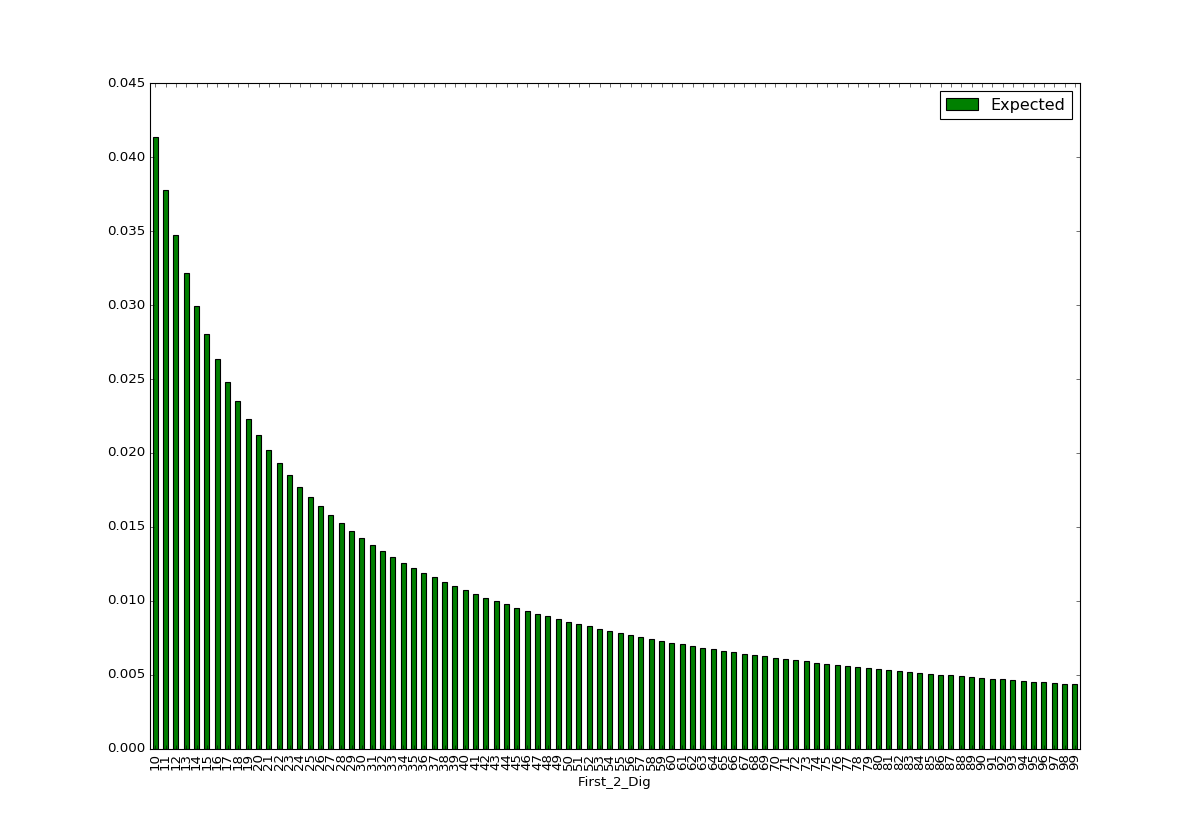

In [9]:
f2d = bf.First(2)

<IPython.core.display.Javascript object>


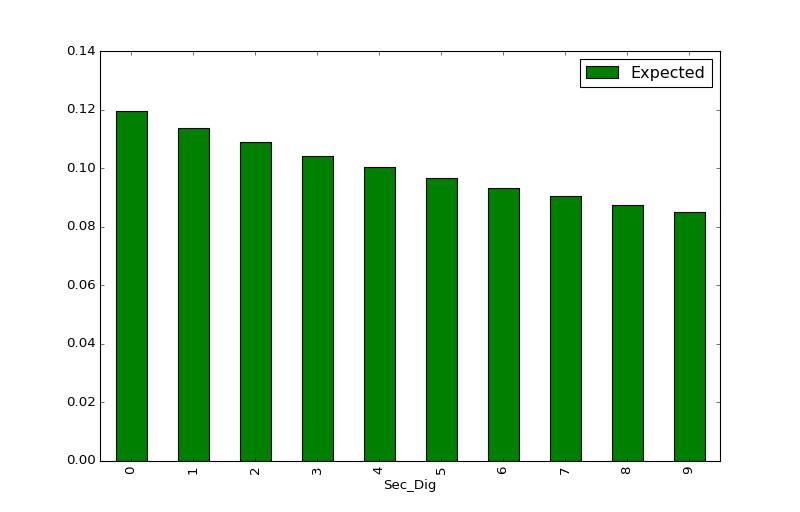

In [11]:
sd = bf.Second() #note decrease in steapness

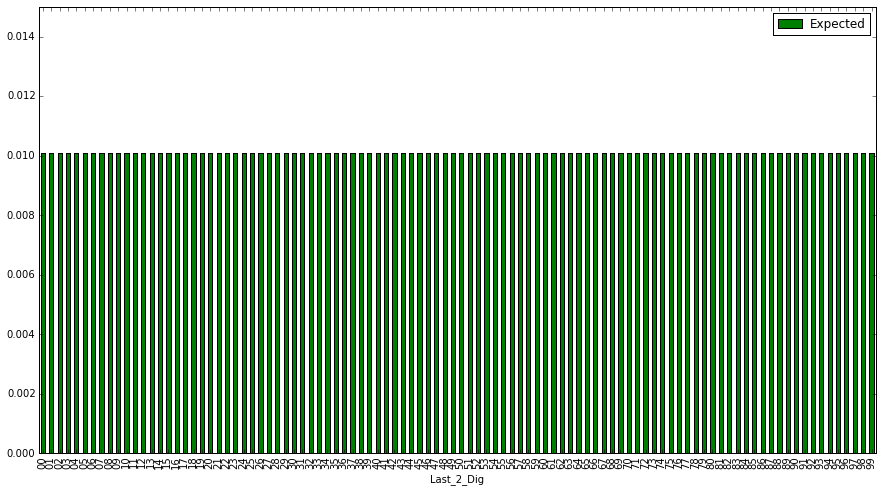

In [23]:
l2d = bf.LastTwo()

### Now to real usage
##### Benford's Analysis is the study of a series of numbers through the recording of digits position and comparing the digits proportion in the series with Benford's expected didstributions.

##### The main class in the Benford module is 'Analysis'. It takes a sequence of numbers and creates a pandas DataFrame with columns that refer to the digits and their position in each number.

In [6]:
a = bf.Analysis(abs(sp.l_r), dec=8)  # used absolute values of SPY log returns
a.head(10)

Initialized sequence with 5967 registries.


,Seq,ZN,F1D,SD,F2D,F3D,L2D
Date,,,,,,,
1993-02-01,0.007087,708719,7,0,70,708,19
1993-02-02,0.002115,211528,2,1,21,211,28
1993-02-03,0.010516,1051648,1,0,10,105,48
1993-02-04,0.004175,417534,4,1,41,417,34
1993-02-05,0.000696,69577,6,9,69,695,77
1993-02-08,0.000000,0,0,0,0,0,0
1993-02-09,0.006974,697352,6,9,69,697,52
1993-02-10,0.001399,139859,1,3,13,139,59
1993-02-11,0.004881,488086,4,8,48,488,86


In [13]:
z =np.log10(sp.l_r[sp.l_r!=0]).min()
z

-4.3374801760497723

In [14]:
int(4-z)

8

In [16]:
sp[sp.columns[(sp !=0.0).any()]]

,Open,High,Low,Close,Volume,Adj_Close,p_r,l_r
Date,,,,,,,,
1993-01-29,43.968700,43.968700,43.750000,43.937500,1003200,28.165877,NaN,NaN
1993-02-01,43.968700,44.250000,43.968700,44.250000,480500,28.366203,0.007112,0.007087
1993-02-02,44.218700,44.375000,44.125000,44.343700,201300,28.426269,0.002118,0.002115
1993-02-03,44.406200,44.843700,44.375000,44.812500,529400,28.726791,0.010572,0.010516
1993-02-04,44.968700,45.093700,44.468700,45.000000,531500,28.846986,0.004184,0.004175
1993-02-05,44.968700,45.062500,44.718700,44.968700,492100,28.826922,-0.000696,-0.000696
1993-02-08,44.968700,45.125000,44.906200,44.968700,596100,28.826922,0.000000,0.000000
1993-02-09,44.812500,44.812500,44.562500,44.656200,122100,28.626596,-0.006949,-0.006974
1993-02-10,44.656200,44.750000,44.531200,44.718700,379600,28.666661,0.001400,0.001399


In [7]:
%matplotlib inline
import matplotlib.pyplot as plt

In [8]:
plt.style.use('ggplot')


---Test performed on 5967 registries.---


The entries with the significant deviations are:

             Expected     Found    Z_test
First_1_Dig                              
2            0.176091  0.156863  3.899557
3            0.124939  0.111781  3.073803
6            0.066947  0.074577  2.358236
4            0.096910  0.088487  2.199441
9            0.045757  0.051617  2.166186
8            0.051153  0.057148  2.102056

The Mean Absolute Deviation is 0.00800730058827
	For the First Digit:
	- 0.0000 to 0.0006: Close Conformity
	- 0.0006 to 0.0012: Acceptable Conformity
	- 0.0012 to 0.0015: Marginally Acceptable Conformity
	- Above 0.0015: Nonconformity


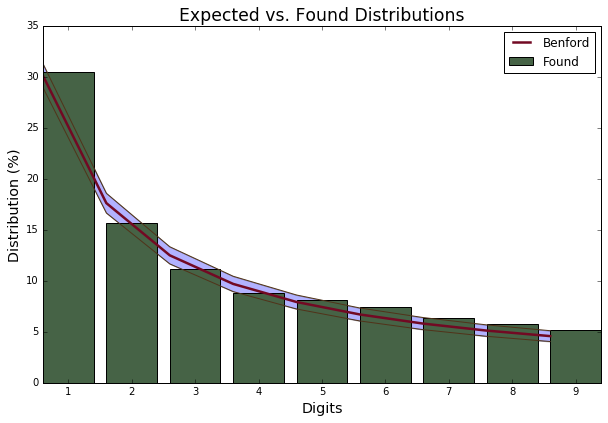

In [10]:
a.first_digits(1, show_high_Z='all')


---Test performed on 5967 registries.---


The entries with the significant positive deviations are:

             Expected     Found    Z_test
First_2_Dig                              
67           0.006434  0.010390  3.822368
10           0.041393  0.050277  3.445057

The Mean Absolute Deviation is 0.00140007993098
	For the First Two Digits:
	- 0.0000 to 0.0012: Close Conformity
	- 0.0012 to 0.0018: Acceptable Conformity
	- 0.0018 to 0.0022: Marginally Acceptable Conformity
	- Above 0.0022: Nonconformity


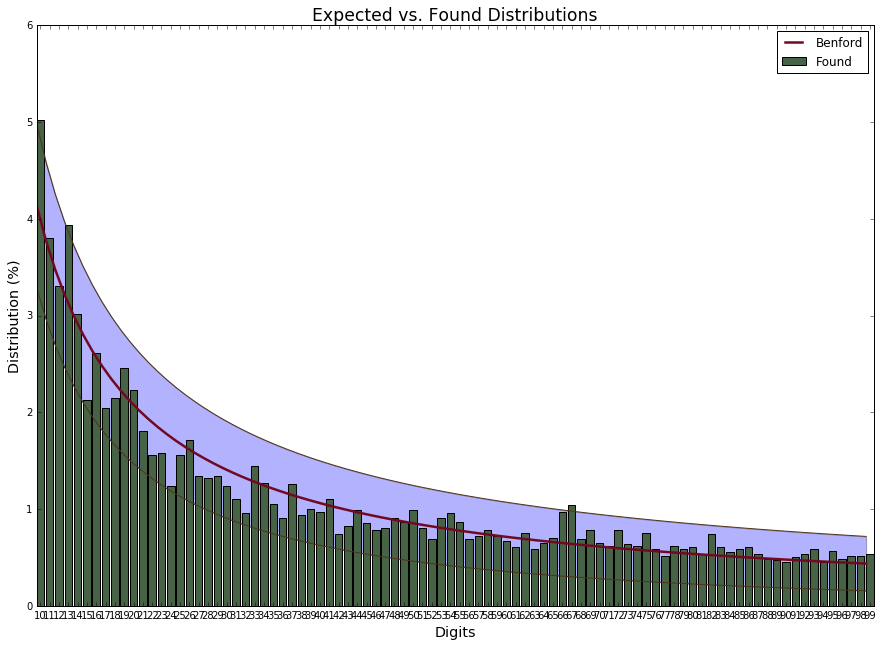

In [9]:
a.first_digits(2, conf_level=99.9)

In [10]:
import matplotlib.pyplot as plt

In [14]:
plt.title()

NameError: name 'plt' is not defined